## Activation Functions:
* **Definition**: Mathematical equations that determine the output of a neural network node.
* **Purpose**: Introduce non-linearity into the network, allowing it to learn complex patterns.
* **Location**: Applied after the weighted sum of inputs in each neuron.
* **Importance**: Enable neural networks to approximate any function, making them universal function approximators.

## Sigmoid Function:
* **Shape**: S-shaped curve
* **Output Range**: 0 to 1

## Hyperbolic Tangent (tanh) Function:
* **Shape**: S-shaped curve, similar to sigmoid but steeper
* **Output Range**: -1 to 1


## Rectified Linear Unit (ReLU) Function:
* **Shape**: Linear for positive values, zero for negative values
* **Output Range**: 0 to infinity

# 1. Implement and Visualize Activation Functions:

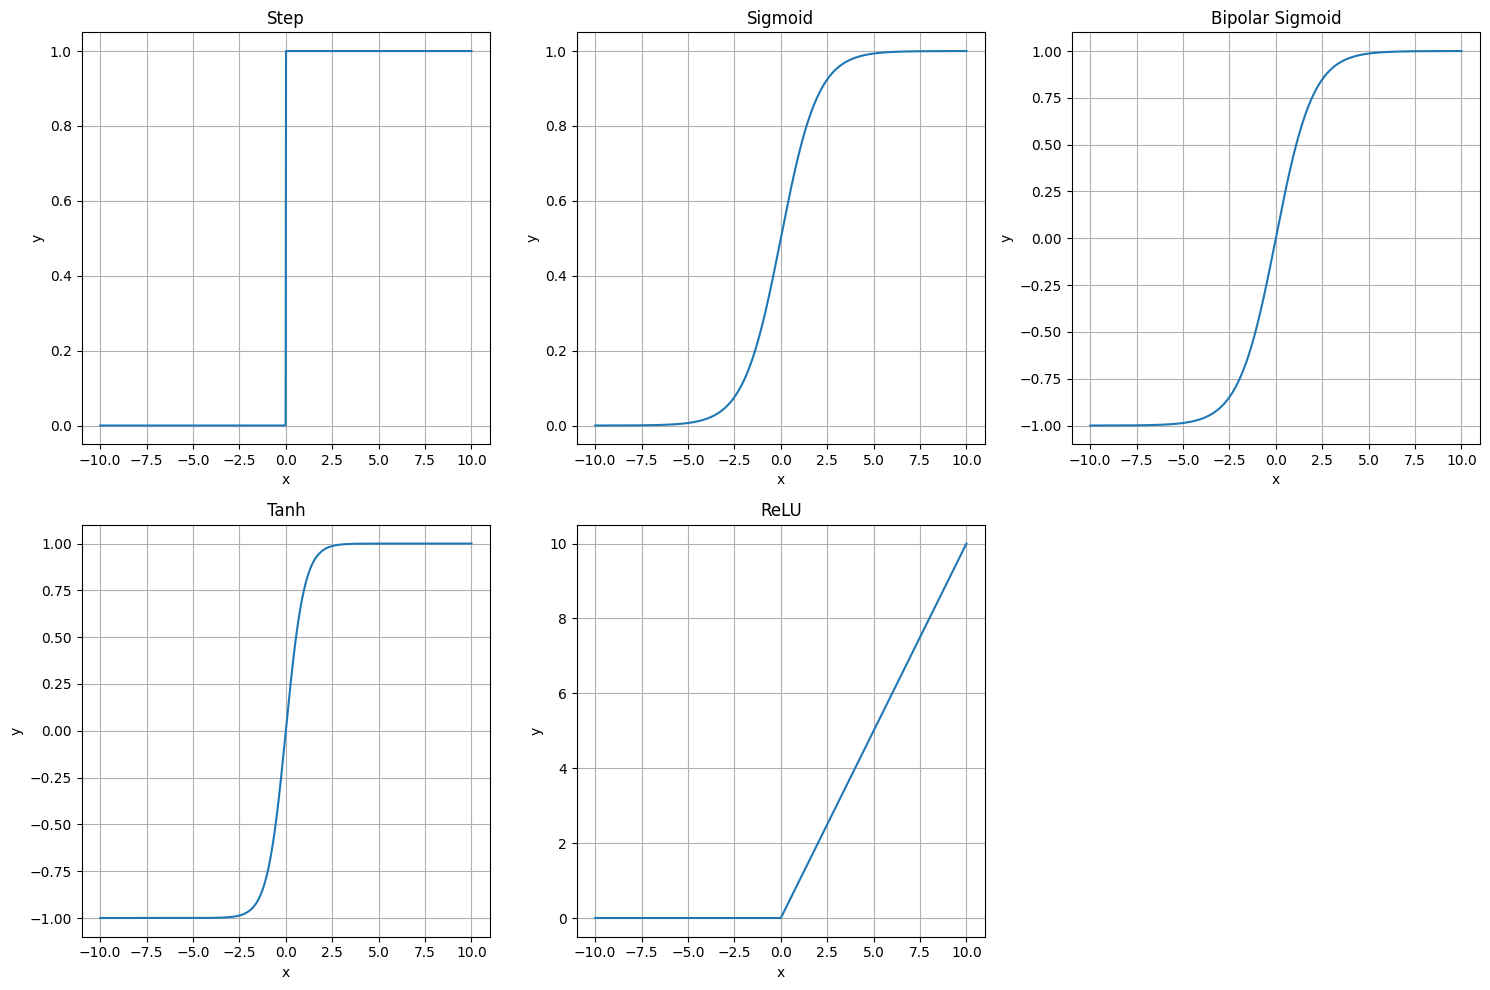

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

def step_function(x):
    return np.where(x >= 0, 1, 0)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def bipolar_sigmoid(x):
    return (1 - np.exp(-x)) / (1 + np.exp(-x))

def tanh(x):
    return np.tanh(x)

def relu(x):
    return np.maximum(0, x)

x = np.linspace(-10, 10, 1000)
functions = [
    ("Step", step_function),
    ("Sigmoid", sigmoid),
    ("Bipolar Sigmoid", bipolar_sigmoid),
    ("Tanh", tanh),
    ("ReLU", relu)
]

plt.figure(figsize=(15, 10))
for i, (name, func) in enumerate(functions, 1):
    plt.subplot(2, 3, i)
    plt.plot(x, func(x))
    plt.title(name)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.grid(True)
plt.tight_layout()
plt.show()



# 2. Implement a Simple Neural Network:

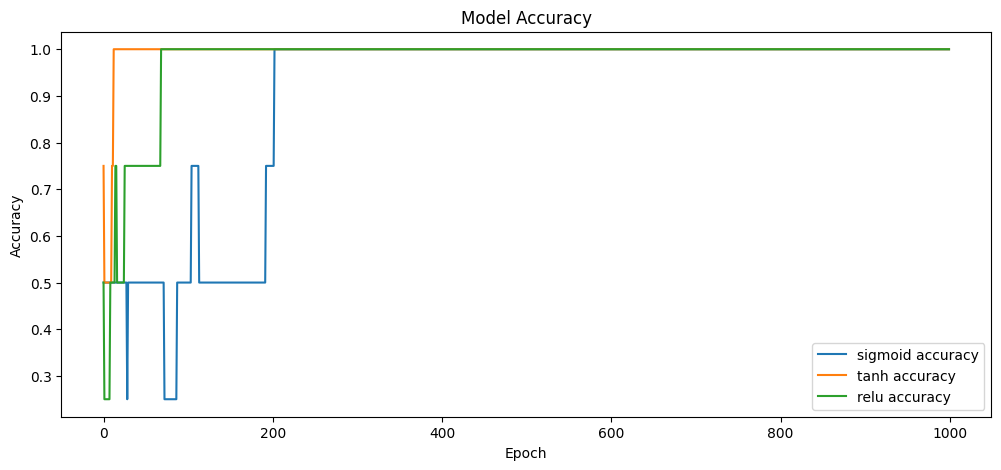

Sigmoid - Loss: 0.0264, Accuracy: 1.0000
Tanh - Loss: 0.0045, Accuracy: 1.0000
Relu - Loss: 0.0020, Accuracy: 1.0000


In [4]:
# 2. Implement a Simple Neural Network

# XOR dataset
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

# Create models with different activation functions
def create_model(activation):
    model = Sequential([
        Dense(4, input_shape=(2,), activation=activation),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=Adam(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])
    return model

activations = ['sigmoid', 'tanh', 'relu']
histories = {}

for activation in activations:
    model = create_model(activation)
    history = model.fit(X, y, epochs=1000, verbose=0)
    histories[activation] = history.history

# Plot training curves
plt.figure(figsize=(12, 5))
for activation, history in histories.items():
    plt.plot(history['accuracy'], label=f'{activation} accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Evaluate models
for activation in activations:
    model = create_model(activation)
    model.fit(X, y, epochs=1000, verbose=0)
    loss, accuracy = model.evaluate(X, y, verbose=0)
    print(f"{activation.capitalize()} - Loss: {loss:.4f}, Accuracy: {accuracy:.4f}")

Sigmoid: It starts at 0.5 and slowly increases or decreases towards 0 or 1 based on the input.
Tanh: It starts at 0 and ranges from -1 to 1.
Relu: It is 0 for negative inputs and and linear for positive inputs.
The plot shows that the relu activation function has the highest accuracy throughout the training process, followed by tanh and then sigmoid.